<h1 align = 'center'> Problem Statement </h1>
<br>
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.



<h2 align = 'center'> About the data </h2>
<br>

|Variable|	Definition|
|:---|:---|
|User_ID|	User ID||
|Product_ID|	Product ID|
|Gender|	Sex of User|
| Age|	Age in bins|
| Occupation|	Occupation (Masked)|
| City_Category|	Category of the City (A,B,C)|
| Stay_In_Current_City_Years|	Number of years stay in current city|
| Marital_Status|	Marital Status|
| Product_Category_1|	Product Category (Masked)|
| Product_Category_2|	Product may belongs to other category also (Masked)|
| Product_Category_3|	Product may belongs to other category also (Masked)|
| Purchase|	Purchase Amount (Target Variable)|

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\tejas\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


\newpage

# Reading the dataset

In [2]:
bf = pd.read_csv('data/black_friday/blackFriday_train.csv')
bf_test = pd.read_csv('data/black_friday/blackFriday_test.csv')
bf.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


\newpage

# Data Manipulations

* Create a copy of the original train and test datasets so that we dont make any modifications to the original data set.
* Removing unwanted columns from both train and test set. (User_ID and Product_ID). Will be used for visualizations. Hence a copy of the dataset has been created.
* Since all values must be numerical and single numbers we do various manipulations to the columns as per their type. 
* Lastly we have also made certain datatype changes.



In [3]:
#Writing a function for all manipulations so that it can be used for the test set as well. Manipulations are done on a copy of the dataset keeping the original file unchanged.
def datamanipulations(file,inplace = False):
    file1 = file.copy() 
    file1.drop(['User_ID','Product_ID'],axis = 1, inplace = inplace)
    file1['Gender'].replace({'M':0,'F':1}, inplace = inplace)
    file1['Age'].replace({'0-17':0, '55+':6, '26-35':2, '46-50':4, '51-55':5, '36-45':3, '18-25':1}, inplace = inplace)
    file1['B'] = [i == 'B' for i in file1['City_Category']]
    file1['C'] = [i == 'C' for i in file1['City_Category']]
    file1.replace({True:1,False:0}, inplace = inplace)
    file1.drop('City_Category',axis = 1, inplace = inplace)
    file1['Stay_In_Current_City_Years'].replace({'4+':4}, inplace = inplace)
    file1['Stay_In_Current_City_Years'] = file1['Stay_In_Current_City_Years'].astype('int64')
    file1['Product_Category_1'] = file1['Product_Category_1'].astype('float64') 
    file1.fillna(0, inplace = inplace)
    return file1

## Applying the data manipulation function to the train and test set.

In [4]:
train = datamanipulations(bf,inplace = True)
test = datamanipulations(bf_test, inplace = True)

\newpage

## Dataset ready for model creation

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      233599 non-null  int64  
 1   Age                         233599 non-null  int64  
 2   Occupation                  233599 non-null  int64  
 3   Stay_In_Current_City_Years  233599 non-null  int64  
 4   Marital_Status              233599 non-null  int64  
 5   Product_Category_1          233599 non-null  float64
 6   Product_Category_2          233599 non-null  float64
 7   Product_Category_3          233599 non-null  float64
 8   B                           233599 non-null  int64  
 9   C                           233599 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 17.8 MB


\newpage

# Visualizations

## Gender vs Product Category

* The gender category sees a difference in product category demand. However when we look at the count of the dataset, the two genders don't have an equal count. One outweighs the other. In other words, gender does not play a role in product category selection.

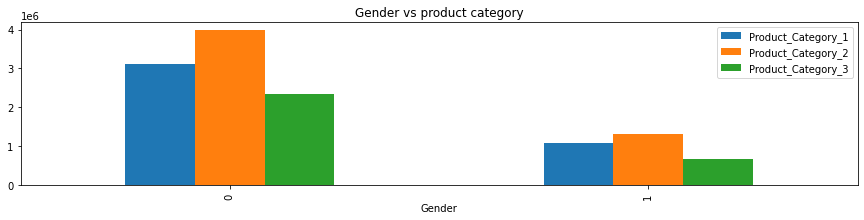

In [6]:
data = pd.concat([train,test])
data.groupby('Gender').agg('sum')[['Product_Category_1','Product_Category_2','Product_Category_3']].plot(kind = 'bar',figsize = (15,3) ,title = 'Gender vs product category')

## Age vs Purchase

* Next we looked at the age category and how age has an impact on purchases. As can be seen in the graph below people aged between 26-35 make the most purchases in the store during black friday.

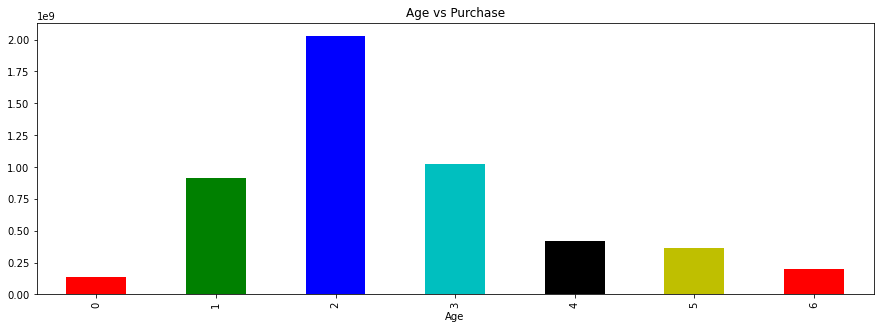

In [7]:
Agewise = data.groupby('Age').sum()['Purchase']
Agewise.plot(kind = 'bar', color = ['r','g','b','c','k','y'], figsize = (15,5), title = 'Age vs Purchase')

## Age vs Occupation vs Purchase

* Comparing occupation and age we see that younger people aren't employeed as much as the older people which shows the authenticity of the data. People aged 36-45 seem to occupy all the occupation options presented in our survey.

* We don't see any differences in purchasing habits based on occupation of people.

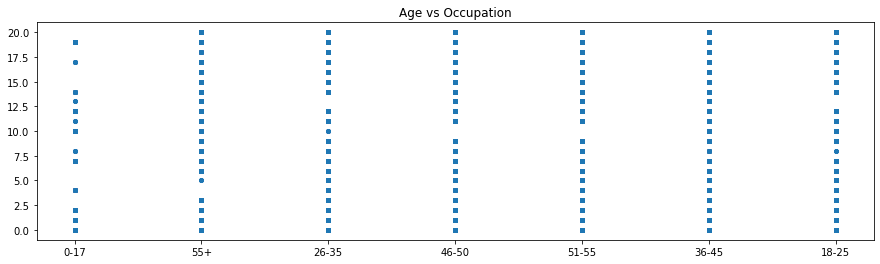

In [8]:
plt.figure(figsize = (15,4))
plt.title('Age vs Occupation')
plt.scatter(x = bf['Age'], y = bf['Occupation'], s  =12)

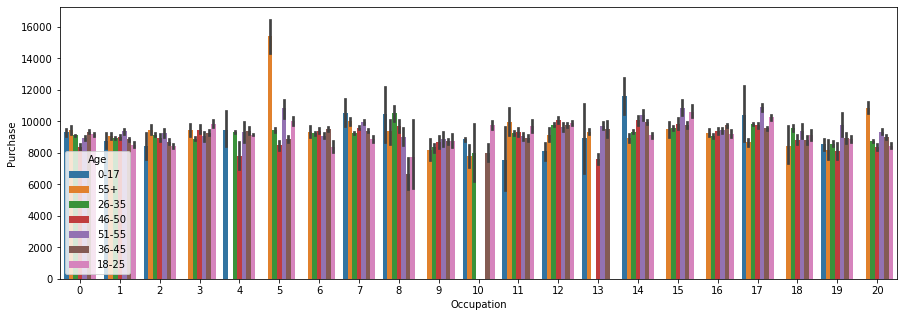

In [16]:
plt.figure(figsize = (15,5))
sns.barplot('Occupation','Purchase',hue = 'Age' ,data = bf)

## Stay in years vs purchases

* Seems to be that according to this dataset people who have lived in the city for approx. a year seem to make the most amount of prchases. Then it seems to stabilize overtime. Should be looked into further.

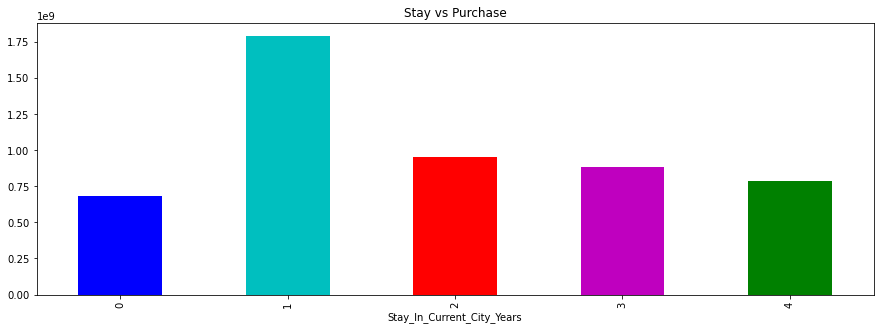

In [10]:
staywise = train.groupby('Stay_In_Current_City_Years').agg('sum')['Purchase']
staywise.plot(kind = 'bar', color = ['b','c','r','m','g'], figsize = (15,5), title = 'Stay vs Purchase')

## Marital status and purchases

* I do not see marital status having a profound impact on purchases. A bit surprising since married people have more members in their family. Probably people married or un-married purchase similar products during blackfriday. These do not involve your typical grocery purchases since expensive things are discounted during this time. This is why we don't see any differences in purchasing activity.

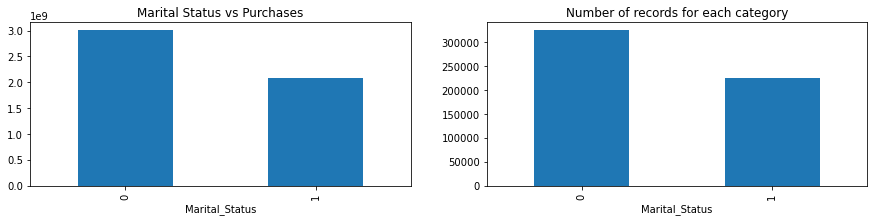

In [11]:
plt.figure(figsize = (15,3))
plt.subplot(1,2,1)
bf.groupby('Marital_Status').sum()['Purchase'].plot(kind= 'bar', title = 'Marital Status vs Purchases')
plt.subplot(1,2,2)
bf.groupby('Marital_Status').count()['Purchase'].plot(kind = 'bar', title = 'Number of records for each category')

## Age vs Purchases as a percentage with gender

* There is no significant difference between age and purchases. Here also we see that Men seem to purchase more than women but we also know that number of records is greatly skewed towards men. Hence we cannot conclude that gender is playing a role in purchasing.

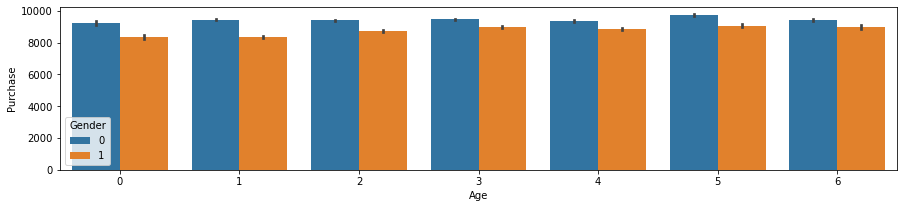

In [12]:
plt.figure(figsize = (15,3))
sns.barplot('Age','Purchase',hue = 'Gender',data = data)

## Product Category vs Purchase

* We see in the below visualizations that marital status has no significant impact on product category choice or purchases.
* Overall Product Category 3 seems to be the most popular.

### Category1 vs Purchased

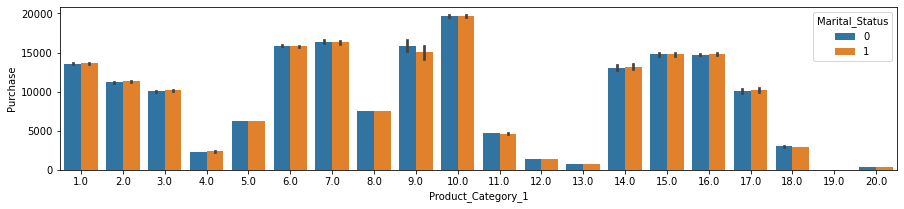

In [13]:
plt.figure(figsize = (15,3))
sns.barplot('Product_Category_1', 'Purchase', hue = 'Marital_Status', data = train)

### Category2 vs Purchased

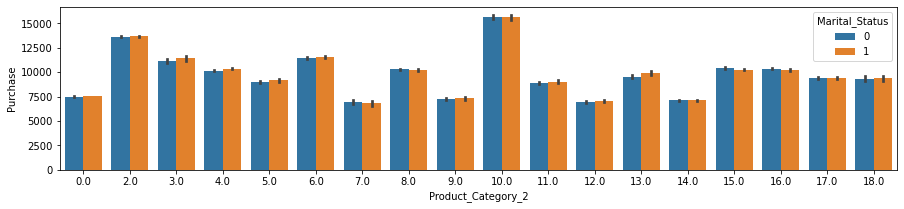

In [14]:
plt.figure(figsize = (15,3))
sns.barplot('Product_Category_2', 'Purchase', hue = 'Marital_Status', data = train)

### Category3 vs Purchased

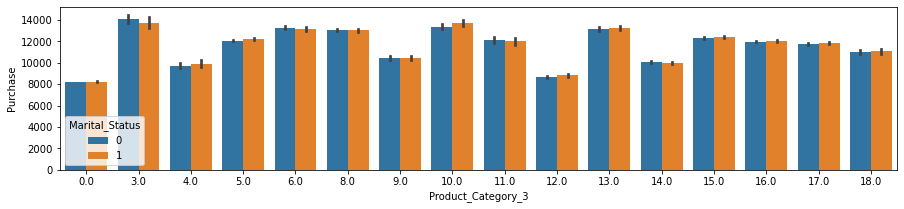

In [15]:
plt.figure(figsize = (15,3))
sns.barplot('Product_Category_3', 'Purchase', hue = 'Marital_Status', data = train)

\newpage

# Preprocessing

In [18]:
X = train.drop('Purchase', axis = 1)
y = train.Purchase
print(X.shape)
print(y.shape)

(550068, 10)
(550068,)


## Splitting the dataset into test and train

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 10)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(440054, 10)
(440054,)
(110014, 10)
(110014,)


## Feature scaling

* Done so that all the data is on the same scale.

In [21]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [22]:
X_train

array([[-0.57325853,  1.85085028,  1.06194788, ..., -0.61474844,
         1.17485805, -0.67189792],
       [-0.57325853,  0.3730246 , -1.08497076, ...,  1.6248829 ,
        -0.85116666,  1.48832132],
       [ 1.74441364, -1.10480109, -0.7782681 , ...,  1.6248829 ,
        -0.85116666,  1.48832132],
       ...,
       [-0.57325853,  0.3730246 , -0.16486277, ..., -0.61474844,
         1.17485805, -0.67189792],
       [ 1.74441364,  1.11193744, -1.08497076, ..., -0.61474844,
         1.17485805, -0.67189792],
       [-0.57325853, -0.36588825, -0.16486277, ..., -0.61474844,
         1.17485805, -0.67189792]])

In [23]:
X_test

array([[-0.57325853,  0.3730246 ,  1.82870454, ..., -0.61474844,
         1.17485805, -0.67189792],
       [-0.57325853, -0.36588825, -0.62491676, ..., -0.61474844,
         1.17485805, -0.67189792],
       [-0.57325853, -1.10480109, -1.23832209, ..., -0.61474844,
        -0.85116666, -0.67189792],
       ...,
       [-0.57325853,  1.11193744,  1.36865055, ...,  2.1048039 ,
        -0.85116666,  1.48832132],
       [-0.57325853,  0.3730246 , -0.7782681 , ..., -0.61474844,
        -0.85116666, -0.67189792],
       [ 1.74441364, -1.10480109, -1.23832209, ..., -0.61474844,
         1.17485805, -0.67189792]])

Now we have features for both training and testing. The data can now be converted to a dataframe, if necessary, and can be fed to a machine learning model.